In [1]:
import random
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from convnets.utilities import utils
#import utils.ipynb
import talos
import numpy as np


Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '/home/mksnkv/Documents/classification/passport_2class_divided_small/train'
validation_data_dir = '/home/mksnkv/Documents/classification/passport_2class_divided_small/validation'

weigths_path = '/home/mksnkv/models/simple/conv4blocks_test.h5'
structure_path = '/home/mksnkv/models/simple/conv4blocks_test.json'
nb_train_samples = 1000 # 3000? 
nb_validation_samples = 300
#nb_evaluation_samples = 560
epochs = 100
batch_size = 1

In [3]:
def olgas_model_for_mishas_diploma_params(X_train, y_train, x_val, y_val, params):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), input_shape=(224, 224, 3), activation='relu', kernel_initializer = params['kernel_initializer']))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer = params['kernel_initializer']))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer = params['kernel_initializer']))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer = params['kernel_initializer']))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dropout(params['dropout'])) #-----? 
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    # COMPILE
    
    model.compile(loss='binary_crossentropy',
                  optimizer=params['optimizer'],
                  metrics=['accuracy'])
    
    

    history = model.fit(X_train, y_train,
                        batch_size = params['batch_size'],
                        epochs=params['epochs'],
                        callbacks=[talos.utils.live()],
                        validation_data=[x_val, y_val],
                     )

    return history, model

In [4]:
train_generator, val_generator = utils.init_generators(train_data_dir,
                                                       validation_data_dir,
                                                       img_width,
                                                       img_height,
                                                       1000,
                                                       300)

Found 1000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [5]:
# X_train, y_train = [], []
# for x in range(nb_train_samples):
#     elem = train_generator.next()
#     X_train.append(elem[0])
#     y_train.append(elem[1])
#

In [6]:
# x_val, y_val = [], []
# for x in range(nb_validation_samples):
#     elem = val_generator.next()
#     x_val.append(elem[0])
#     y_val.append(elem[1])
# y_val = [int(x) for x in y_val]
# y_val = np.array(y_val)
#

In [7]:
# y_train = [int(x) for x in y_train]
# y_train = np.array(y_train).reshape(100, 1)
#

In [8]:
# len(X_train), len(y_train)
#

In [9]:
# len(x_val), len(y_val)

In [10]:
x_train, y_train = train_generator.next()
x_val, y_val = val_generator.next()

In [13]:
p = {'batch_size': [10, 15, 30],
     'epochs': [20],
     'dropout':(0, 0.2, 0.5),
     'optimizer': ['RMSProp'],
     'kernel_initializer': ['uniform','normal'],
     }

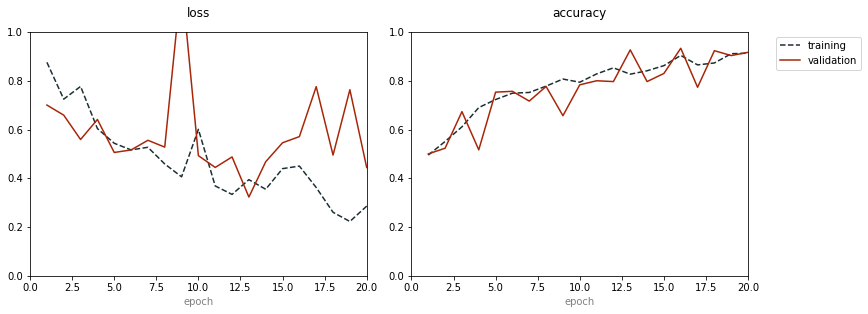

1000/1000 [==============================] - 16s 16ms/sample - loss: 0.2858 - accuracy: 0.9130 - val_loss: 0.4442 - val_accuracy: 0.9167



100%|██████████| 6/6 [37:13<00:00, 372.23s/it]


In [14]:
t = talos.Scan(x=x_train,
               y=y_train,
               x_val = x_val,
               y_val = y_val,
               model=olgas_model_for_mishas_diploma_params,
               params=p,
               experiment_name="le misha's diploma", 
               save_weights=True)

In [22]:
from talos import Deploy

Deploy(t, "le misha's diploma", metric='val_accuracy')


FileExistsError: [Errno 17] File exists: "le misha's diploma"